In [1]:
import pandas as pd
import json
from tqdm import tqdm
import os
from collections import Counter

In [2]:
import geopandas as gpd

In [3]:
import matplotlib.pyplot as plt

In [4]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [6]:
# x = pd.read_json('alth_places/places/JAWLAN_357E330N_S.geojson')

In [7]:
# with open('alth_places/places/JAWLAN_357E330N_S.geojson') as f:
#     y = json.load(f)

In [8]:
# pd.read_json(json.dumps({0: y['properties']['cornuData']}), orient='index')

In [9]:
DIR = 'alth_places/places/'

In [10]:
ilist = []

In [11]:
for fn in tqdm(os.listdir(DIR)[1:]):
    fp = f'{DIR}{fn}'
    with open(fp) as f:
        j = json.load(f)
    ilist.append(j['properties']['cornuData'])

100%|██████████| 2519/2519 [00:12<00:00, 194.15it/s]


In [12]:
df = pd.DataFrame(ilist)

In [13]:
len(df) - len(set(df.toponym_arabic))

191

In [34]:
df

,coord_certainty,toponym_translit_other,cornu_URI,toponym_arabic,top_type_orig,toponym_buckwalter,toponym_arabic_other,toponym_translit,coord_lat,toponym_search,region_code,coord_lon,region_spelled,top_type_hom
0,certain,"Ābāḏaŧ, Arǧumān",ABADHA_526E311N_S,آباذة,cite,"Abadha, Arjuman",آباذة، أرجمان,Ābāḏaŧ,31.16430,"Abadha, Arjuman",Faris,52.66127,Fārs(or Fāris),towns
1,certain,Ābāḏaŧ,ABADHA_537E297N_S,آباذة,cite,Abadha,آباذة,Ābāḏaŧ,29.78210,Abadha,Faris,53.73617,Fārs(or Fāris),towns
2,certain,Abān,ABAN_552E308N_S,أبان,cite,Aban,أبان,Abān,30.88547,Aban,Faris,55.25395,Fārs(or Fāris),towns
3,certain,"Abārkaṯ, Barkāṯ",ABARKATH_673E397N_S,أباركث,cheflieu,"Abarkath, Barkath",أباركث، بركاث,Abārkaṯ,39.79611,"Abarkath, Barkath",Transoxiana,67.38308,Mā-warāʾ-l-nahr (Transoxiana),capitals
4,certain,Abarqūh,ABARQUH_532E311N_S,أبرقوه,cite,Abarquh,أبرقوه,Abarqūh,31.15094,Abarquh,Faris,53.25737,Fārs(or Fāris),towns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,certain,ZiyādābāḏZiyādāwāḏ,ZIYADABADHZIYADAWADH_532E298N_S,زياداباذزياداواذ,etape,ZiyadabadhZiyadawadh,زياداباذزياداواذ,ZiyādābāḏZiyādāwāḏ,29.83708,ZiyadabadhZiyadawadh,Faris,53.22441,Fārs(or Fāris),waystations
2515,certain,Zubālaŧ,ZUBALA_435E294N_S,زبالة,forteresse,Zubala,زبالة,Zubālaŧ,29.40521,Zubala,Badiyat al-Arab,43.56390,Badiyyaŧ al-ʿarab,waystations
2516,certain,al-Zubaydiyyaŧ,ZUBAYDIYYA_468E342N_S,الزبيدية,etape?,al-Zubaydiyya,الزبيدية,al-Zubaydiyyaŧ,34.23099,al-Zubaydiyya,Jibal,46.85168,al-Jibāl,waystations
2517,certain,al-Zubaydiyyaŧ,ZUBAYDIYYA_469E344N_S,الزبيدية,etape?,al-Zubaydiyya,الزبيدية,al-Zubaydiyyaŧ,34.43457,al-Zubaydiyya,Jibal,46.93427,al-Jibāl,waystations


In [23]:
xf = pd.read_excel('yaqcsv.xlsx', header=None, names=['name', 'desc'])

In [24]:
# xf = xf.drop(['Unnamed: 0'], axis=1)

In [25]:
xf

,name,desc
0,آبار الأعراب,# جمع بئر. يقال في جمعها آبار وبئار وأبار: موض...
1,آبج,# بفتح الهمزة وبعد الألف باء موحدة مفتوحة وجيم...
2,آبر,# بفتح الهمزة وسكون الألف وضم الباء الموحدة ور...
3,آبسكون,# بفتح الهمزة وسكون الألف وفتح الباء الموحدة و...
4,آبل,# بفتح الهمزة وبعد الألف باء مكسورة ولام:\n<br...
...,...,...
12449,يونان,# بالضم ثم السكون، ونونين بينهما ألف:\n<br />#...
12450,يؤيؤ,# بالضم ثم السكون ثم مثله، يوم يؤيؤ: وهو يوم ا...
12451,يهرع,# بالفتح، قوله تعالى: وجاءه قومه يهرعون إليه، ...
12452,اليهودية,# نسبة إلى اليهود في موضعين: أحدهما محلة بجرجا...


In [27]:
# ftoponyms = flatten(toponyms)

In [28]:
mappl = {}
for i, t in enumerate(df.itertuples()):
    for k in t.toponym_arabic_other.split('، '):
        mappl[k] = i

In [29]:
xf['althix'] = xf.name.map(mappl)

In [30]:
xf.althix = xf.althix.astype(int, errors='ignore')

In [33]:
xf

,name,desc,althix
0,آبار الأعراب,# جمع بئر. يقال في جمعها آبار وبئار وأبار: موض...,NaN
1,آبج,# بفتح الهمزة وبعد الألف باء موحدة مفتوحة وجيم...,NaN
2,آبر,# بفتح الهمزة وسكون الألف وضم الباء الموحدة ور...,NaN
3,آبسكون,# بفتح الهمزة وسكون الألف وفتح الباء الموحدة و...,7.0
4,آبل,# بفتح الهمزة وبعد الألف باء مكسورة ولام:\n<br...,NaN
...,...,...,...
12449,يونان,# بالضم ثم السكون، ونونين بينهما ألف:\n<br />#...,NaN
12450,يؤيؤ,# بالضم ثم السكون ثم مثله، يوم يؤيؤ: وهو يوم ا...,NaN
12451,يهرع,# بالفتح، قوله تعالى: وجاءه قومه يهرعون إليه، ...,NaN
12452,اليهودية,# نسبة إلى اليهود في موضعين: أحدهما محلة بجرجا...,2475.0


In [120]:
ct = Counter(ftoponyms)

In [89]:
len(xf)

12454

In [123]:
dups = 0
for n in xf[xf.althix.notna()].name:
    if ct[n] > 1:
        dups += 1
        

In [35]:
joined = xf.join(df, on='althix', how='inner')

In [36]:
gf = gpd.GeoDataFrame(joined,
                 geometry=gpd.points_from_xy(joined.coord_lon.astype(float), joined.coord_lat.astype(float)))

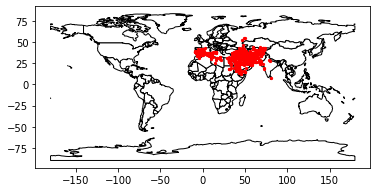

In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')
gf.plot(ax=base, marker='o', color='red', markersize=5);
# plt.figure(figsize=(10,10))
plt.show()

In [38]:
wdf = pd.read_csv('../HaMapah-Local/wikidata-gazetteer.tsv', delimiter='\t')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
wdf.fillna('', inplace=True)

In [175]:
# cwf = wdf.fillna('')

In [41]:
len(wdf)

4198913

In [69]:
# WDF is really long, let's limit the coordinates
LONG_MAX = 90
LONG_MIN = -15

LAT_MAX = 45
LAT_MIN = 6

In [72]:
cwf = wdf[(LAT_MIN < wdf.latitude) & (wdf.latitude < LAT_MAX) & (wdf.longitude > LONG_MIN) & (wdf.longitude < LONG_MAX)]

In [74]:
len(cwf), len(cwf) / len(wdf)

(647744, 0.1542646870749644)

In [75]:
cwf.head()

,wikidata_id,primary_name,enwiki_title,alternative_names,country,country_code,wikidata_classes,elevation,geonames_id,latitude,longitude,population,osm_id
2,Q29,Spain,Spain,"Španělsko,Spanje,Espay,西班牙,Spanien,Spánn,Испан...",Spain,ES,member state of the European Union; country; m...,,2.51077e+06,40.000000,-3.000000,3.0455e+07,1311341
18,Q221,Republic of Macedonia,Republic of Macedonia,"Makedonie,Macedonië,Repiblik d Masedoni,Mazedo...",Republic of Macedonia,MK,member state of the United Nations; country; m...,,718075,41.650000,21.716667,1.47114e+06,53293
19,Q227,Azerbaijan,Azerbaijan,"Ázerbájdžán,Aâzerbeidzjan,Azerbaydjan,Aserbaid...",Azerbaijan,AZ,member state of the United Nations; country; l...,,587116,40.300000,47.700000,3.89789e+06,364110
20,Q228,Andorra,Andorra,"Andora,安道尔,Андорра,এন্ডোরা,アンドラ,ประเทศอันดอร์ร...",Andorra,AD,member state of the United Nations; country; l...,,3.04156e+06,42.558333,1.555278,13414,9407
26,Q398,Bahrain,Bahrain,"Bahrajn,Bahrein,Barayn,Barein,Бахрейн,Бахрэйн,...",Bahrain,BH,member state of the United Nations; country; i...,,290291,26.067500,50.551111,162501,378734


In [76]:
names = {}
for i, n in tqdm(zip(cwf.wikidata_id, cwf.alternative_names), total=len(cwf)):
    for nm in n.split(','):
        names[nm] = i

100%|██████████| 647744/647744 [00:01<00:00, 505189.20it/s]


In [77]:
xf['wikidataID'] = xf.name.map(names)

In [78]:
len(xf[['wikidataID', 'althix']].dropna(how='all'))

2582

In [86]:
xw = xf.join(wdf.set_index('wikidata_id'), on='wikidataID', how='left')

In [87]:
dj = xw.join(df, on='althix', how='left')

In [90]:
len(dj)

12454

In [91]:
dj['mlat'] = dj.coord_lat.combine_first(dj.latitude)
dj['mlon'] = dj.coord_lon.combine_first(dj.longitude)

In [92]:
# mgf = dj.dropna(subset=['mlat'])

In [94]:
# mgf.to_excel('combined_wd_alth_new.xlsx')

In [97]:
dj.to_excel('FullYakut-Matched.xlsx')

In [98]:
# 